# Answer 1A

As seen from the cell output below, 

**Sparsity  = 0.017**

In [59]:
dataset_path = 'Synthetic_Movie_Lens/'
data = pd.read_csv(dataset_path+"ratings.csv",usecols=['userId','movieId','rating'])
user_ID = data['userId'].values
movie_ID = data['movieId'].values
rating = data['rating'].values
sparsity = len(rating)/(len(set(movie_ID))*len(set(user_ID)))
print('Sparsity:',sparsity)


Sparsity: 0.016999683055613623


# Answer 1B

Histogram output is as follows below:

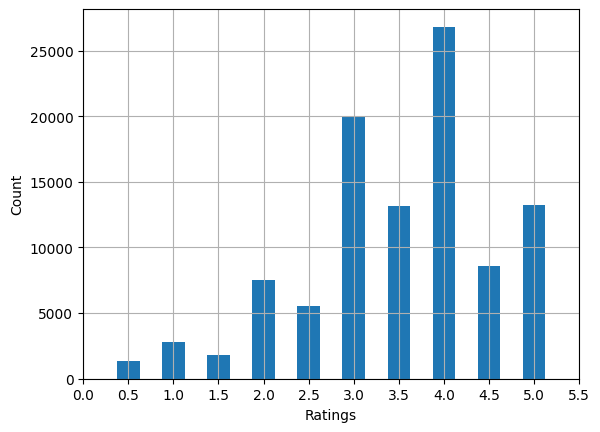

In [ ]:
u, inv = np.unique(rating, return_inverse=True)
plt.bar(u, np.bincount(inv), width=0.25)
locs, labels = plt.xticks()
plt.grid(linestyle='-')
plt.xticks(np.arange(0,6,0.5),rotation=0)
plt.ylabel('Count')
plt.xlabel('Ratings')
plt.show()


# Answer 1C

Distribution of the number of ratings received among movies as in the cell output below: 

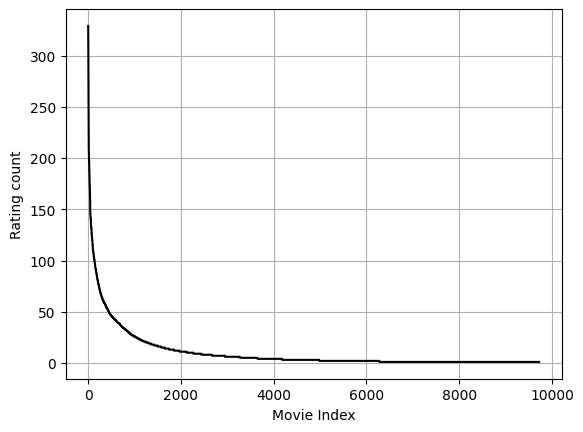

In [ ]:
unique, counts = np.unique(movie_ID, return_counts=True)
plt.plot(range(1,len(unique)+1),counts[np.argsort(counts)[::-1]],color='black')
plt.grid(linestyle='-')
plt.ylabel('Rating count')
plt.xlabel('Movie Index')
plt.show()


In [ ]:
movie_count_dict = {}
x = list(range(1,len(unique)+1))
for key in unique[np.argsort(counts)[::-1]]:
    for value in x:
        movie_count_dict[key] = value
        x.remove(value)
        break
print('Top 10 rated movies (Movie ID, Index):')
print(list(movie_count_dict.items())[0:10])


Top 10 rated movies (Movie ID, Index):
[(356, 1), (318, 2), (296, 3), (593, 4), (2571, 5), (260, 6), (480, 7), (110, 8), (589, 9), (527, 10)]


# Answer 1D

The distribution of ratings among users is as in the cell output below:

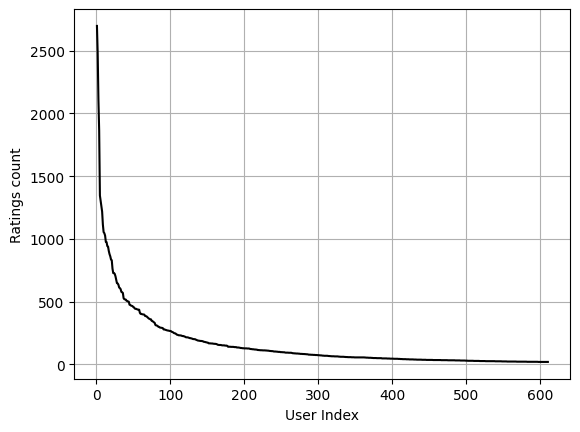

In [ ]:
unique, counts = np.unique(user_ID, return_counts=True)
plt.plot(range(1,len(unique)+1),counts[np.argsort(counts)[::-1]],linestyle='-',color='black')
plt.grid(linestyle='-')
plt.ylabel('Ratings count')
plt.xlabel('User Index')
plt.show()


In [ ]:
user_count_dict = {}
x = list(range(1,len(unique)+1))
for key in unique[np.argsort(counts)[::-1]]:
    for value in x:
        user_count_dict[key] = value
        x.remove(value)
        break
print('Top 10 users who rated most number of times (User ID, Index):')
print(list(user_count_dict.items())[0:10])


Top 10 users who rated most number of times (User ID, Index):
[(414, 1), (599, 2), (474, 3), (448, 4), (274, 5), (610, 6), (68, 7), (380, 8), (606, 9), (288, 10)]


# Answer 1E

**Observations**: The output cell from Answer 1C shows a consistent decrease: indicating that around 500 out of 9742 movies have garnered over 50 unique user ratings. This phenomenon elucidates the sparse nature of the ratings matrix wherein only a handful of movies have accumulated several distinct ratings.


The output cell from Answer 1D is also similar to 1C where we see that the curve is monotonically decreasing, indicating less than 50 users out of 610 providing ratings to 500 movies or more out of 9742. This again explains why the ratings matrix is sparse with a vast number of users who do not provide many number of unique ratings.

**Implications**: Since most of the elements in the sparse representation are not defined or 0, these elements contribute little to no information for the model being trained on the representation resulting in a model with a large number of parameters that perform poorly on those movies with a low number of ratings due to lack of sufficient ratings and overfitting on those movies with a higher number of user ratings. One could attempt to address the above issue with regularization to encourage generalization and prevent formation of ill-conditioned classifiers ,leading to a simpler model with lower number of weights.

# Answer 1F

Variance histogram as below in the cell output :

In [ ]:
unique_movie_ID = list(set(movie_ID))
movie_ID_list = []
var_list = []
for j in range(len(unique_movie_ID)):
    indices = [i for i, x in enumerate(movie_ID) if x == unique_movie_ID[j]]
    var = np.var(np.array(rating[indices]))
    movie_ID_list.append(unique_movie_ID[j])
    var_list.append(var)

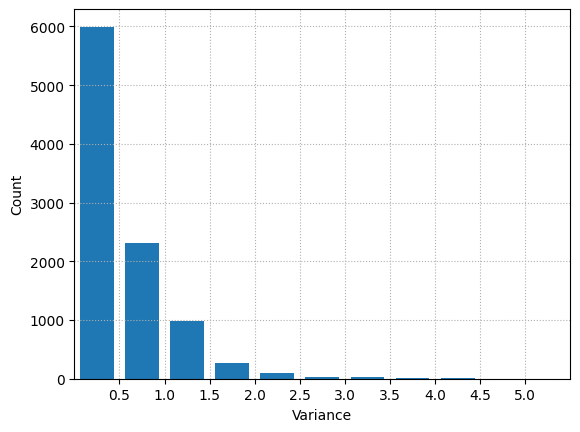

In [ ]:
plt.hist(var_list, bins=np.arange(0,5.5,0.5),rwidth=0.75)
plt.xticks(np.arange(0.5,5.5,0.5))
plt.xlim([0, 5.5])
plt.grid(linestyle=':')
plt.xlabel('Variance')
plt.ylabel('Count')
plt.show()


# Answer 2A

$$\mu_u =\frac{\sum_{k \in I_u} r_{uk}}{|I_u|} $$

# Answer 2B

$I_u \cap I_v$ indicates the set of movies where the ratings are commonly rated by both users $u$ and $v$. Many $I_u \cap I_v$ are expected to be $\phi$ because there will be movies rated by user '$u$' but not by user '$v$' and vice-versa.

# Answer 3

Normalizing the raw ratings by centering them around the mean ratings of users serves to mitigate user-specific biases and characteristics in the ratings, along with reducing the impact of extreme ratings from certain users. Some users may consistently provide high or low ratings, while others may distribute their ratings across the entire spectrum. Mean centering is effective in eliminating these tendencies and outliers, making the data less noisy. This process is particularly beneficial when trying to uncover the interaction between user ratings in the prediction function, as it helps alleviate multicollinearity among predictor variables, thereby facilitating a clearer understanding of the significance of individual user ratings.

 # k-NN collaborative filter

In [4]:
# Defining the reader for surprise library
reader = Reader()
# Load the data into Surprise Dataset
ratings_dataset = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [ ]:
k = np.arange(2,102,2)
rmse = []
mae = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(KNNWithMeans(k=item,sim_options={'name':'pearson'}),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10,n_jobs=-1)
    rmse.append(np.mean(res['test_rmse']))
    mae.append(np.mean(res['test_mae']))


Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


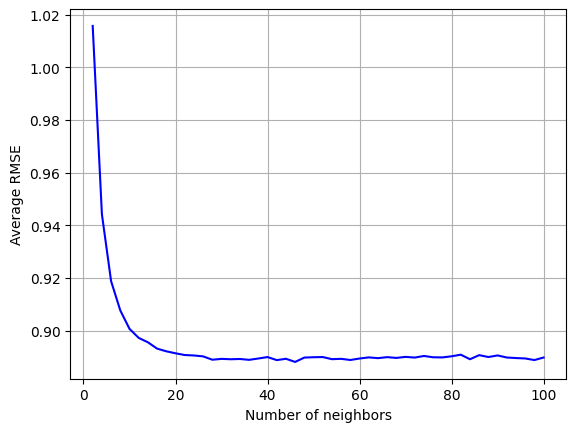

In [ ]:
plt.plot(k,rmse,linestyle='-',color='b')
plt.grid(linestyle='-')
plt.ylabel('Average RMSE')
plt.xlabel('Number of neighbors')
plt.show()


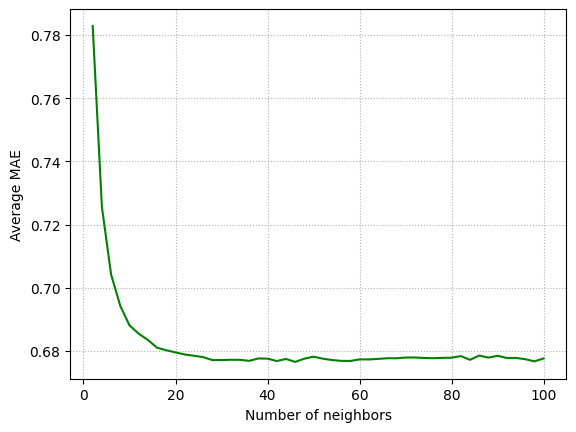

In [ ]:
plt.plot(k,mae,linestyle='-',color='g')
plt.grid(linestyle=':')
plt.ylabel('Average MAE')
plt.xlabel('Number of neighbors')
plt.show()


# Answer 4

The Average RMSE and MAE plots are as shown above in the cell outputs. 

# Answer 5 

We need to figure out the smallest k value where the errors for user-based collaborative filtering stop changing. Looking at Figure 5, we can see that this happens at k = 20, and at that point, the RMSE stays slightly below 0.9, and the MAE stays near 0.68.






# Popular Movie Trimming

In [ ]:
rmse_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_pop.append(np.mean(local_rmse))


Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18


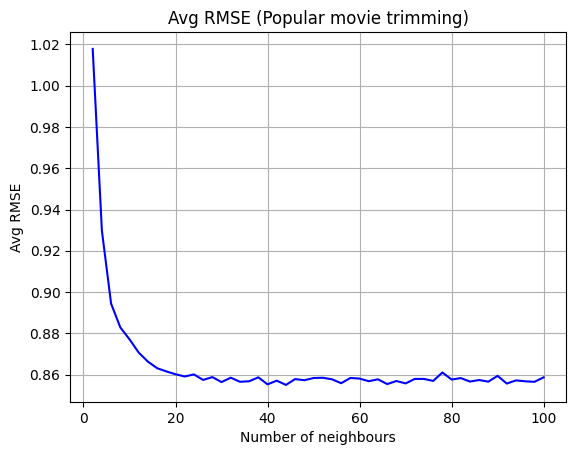

In [ ]:
plt.plot(k,rmse_pop,linestyle='-',color='b')
plt.grid(linestyle='-')
plt.title('Avg RMSE (Popular movie trimming)')
plt.ylabel('Avg RMSE')
plt.xlabel('Number of neighbours')
plt.show()


In [ ]:
print("Minimum average RMSE (Popular movie trimming) = ", min(rmse_pop))

Minimum average RMSE (Popular movie trimming) =  0.8550024964524139


# Unpopular

In [ ]:
rmse_unpop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_unpop.append(np.mean(local_rmse))


Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


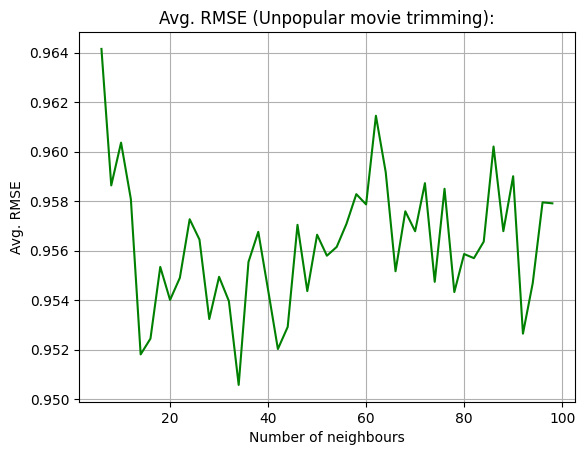

In [ ]:
plt.plot(k[2:-1],rmse_unpop[2:-1],linestyle='-',color='g')
plt.grid(linestyle='-')
plt.title('Avg. RMSE (Unpopular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.show()


In [ ]:
print("Minimum avg. RMSE (Unpopular movie trimming):", min(rmse_unpop))


Minimum avg. RMSE (Unpopular movie trimming): 0.950572362148894


In [ ]:
rmse_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_var.append(np.mean(local_rmse))


Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50
Testing for k = 52
Testing for k = 54
Testing for k = 56
Testing for k = 58
Testing for k = 60
Testing for k = 62
Testing for k = 64
Testing for k = 66
Testing for k = 68
Testing for k = 70
Testing for k = 72
Testing for k = 74
Testing for k = 76
Testing for k = 78
Testing for k = 80
Testing for k = 82
Testing for k = 84
Testing for k = 86
Testing for k = 88
Testing for k = 90
Testing for k = 92
Testing for k = 94
Testing for k = 96
Testing for k = 98
Testing for k = 100


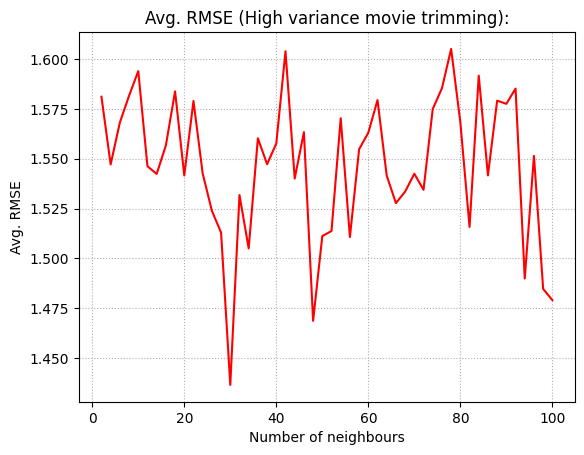

In [ ]:
plt.plot(k,rmse_var,linestyle='-',color='r')
plt.grid(linestyle=':')
plt.title('Avg. RMSE (High variance movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.show()


In [ ]:
print("Minimum avg. RMSE (High variance movie trimming):", min(rmse_var))


Minimum avg. RMSE (High variance movie trimming): 1.4366413310861565


# ROC k-NN CF

In [ ]:
k = 20
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)


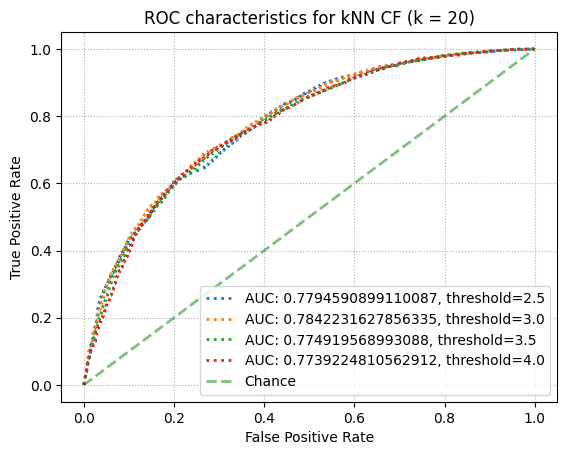

In [ ]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for kNN CF (k = 20)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Answer 6 

• Average RMSE plots are plotted as above. Minimum avergae RMSE for each trimming type is as below: 

| Trimming Type                        | Minimum Avg. RMSE              |
|--------------------------------------|--------------------------------|
| Popular Movie Trimming               | 0.8550                         |
| Unpopular Movie Trimming             | 0.9506                         |
| High Variance Movie Trimming         | 1.4366                         |



• ROC curves along with AUC values are as plotted above condensed in one plot as in cell output . 



# Answer 7

The optimization problem is not jointly convex for the user latent space (U) and item embedding space (V) due to the presence of numerous local minima in the gradient plane of the objective function. This arises from the fact that the matrix factorization model predicts ratings by multiplying U and V, and this approach lacks convexity properties since the objective function is permutation and rotation invariant. Given, $R$ is the ratings matrix, the optimization problem can be solved using ALS by keeping U fixed and solving for
V and vice-versa for next step. Objective formulation without regularization: 



$$\min_{V} \sum{i=1}^{n} \sum_{j=1}^{n} W_{ij} \left( r_{ij} - (UV^T)_{ij}  \right)^2$$
$$V=(UU^T)^{-1}UR$$

# NMF

In [5]:
k = np.arange(2,52,2)
rmse_NMF = []
mae_NMF = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(NMF(n_factors=item,n_epochs=50,verbose=False),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10,n_jobs=-1)
    rmse_NMF.append(np.mean(res['test_rmse']))
    mae_NMF.append(np.mean(res['test_mae']))


Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


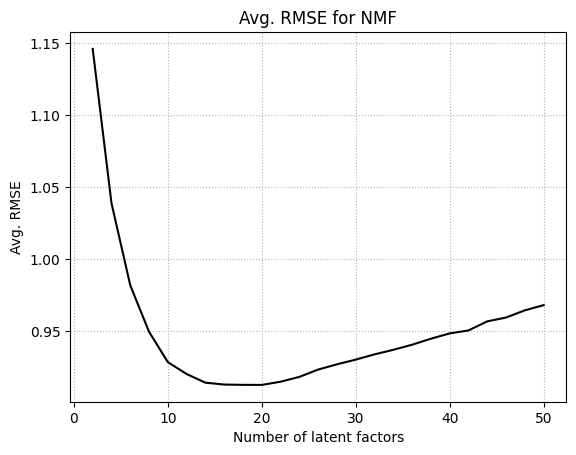

In [6]:
plt.plot(k,rmse_NMF,linestyle='-',color='black')
plt.grid(linestyle=':')
plt.title('Avg. RMSE for NMF')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.show()

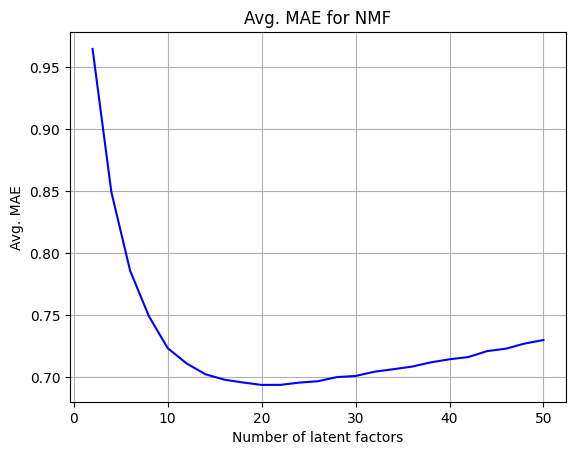

In [7]:
plt.plot(k,mae_NMF,linestyle='-',color='b')
plt.grid(linestyle='-')
plt.title('Avg. MAE for NMF')
plt.ylabel('Avg. MAE')
plt.xlabel('Number of latent factors')
plt.show()


In [8]:
print("Minimum avg. RMSE (NMF): %f, value of k: %d" % (min(rmse_NMF),k[[i for i, x in enumerate(rmse_NMF) if x == min(rmse_NMF)][0]]))
print("Minimum avg. MAE (NMF): %f, value of k: %d" % (min(mae_NMF),k[[i for i, x in enumerate(mae_NMF) if x == min(mae_NMF)][0]]))


Minimum avg. RMSE (NMF): 0.912769, value of k: 20
Minimum avg. MAE (NMF): 0.693552, value of k: 20


# Answer 8A

The Average RMSE and MAE plots are as shown above. 


# Answer 8B

| Metric              | Minimum Avg. Value | Value of k |
|---------------------|--------------------|------------|
| RMSE (NMF)          | 0.9128             | 20         |
| MAE (NMF)           | 0.6936             | 20         |


We see that in both RMSE and MAE, the value of K that yields minimum average vaue is $k=20$. There are 19 genres in the MovieLens dataset, which is very close to the obtained optimal value of $k$.


# Popular NMF

In [9]:
rmse_NMF_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = NMF(n_factors=item,n_epochs=50,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_NMF_pop.append(np.mean(local_rmse))


Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


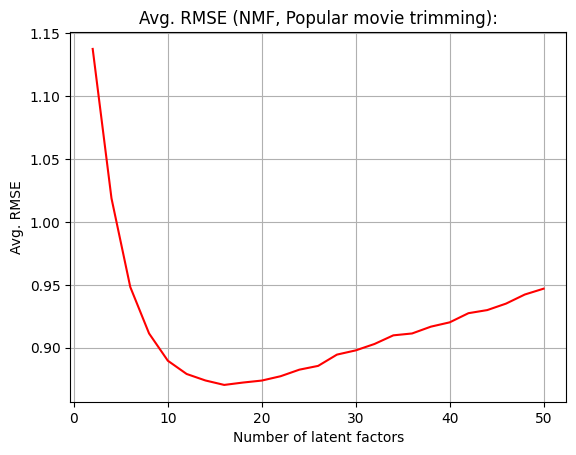

In [10]:
plt.plot(k,rmse_NMF_pop,linestyle='-',color='r')
plt.grid(linestyle='-')
plt.title('Avg. RMSE (NMF, Popular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.show()


In [11]:
print("Minimum avg. RMSE (NMF, Popular movie trimming):", min(rmse_NMF_pop))

Minimum avg. RMSE (NMF, Popular movie trimming): 0.8704414533436309


# Unpopular NMF

In [12]:
rmse_NMF_unpop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = NMF(n_factors=item,n_epochs=50,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_NMF_unpop.append(np.mean(local_rmse))


Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


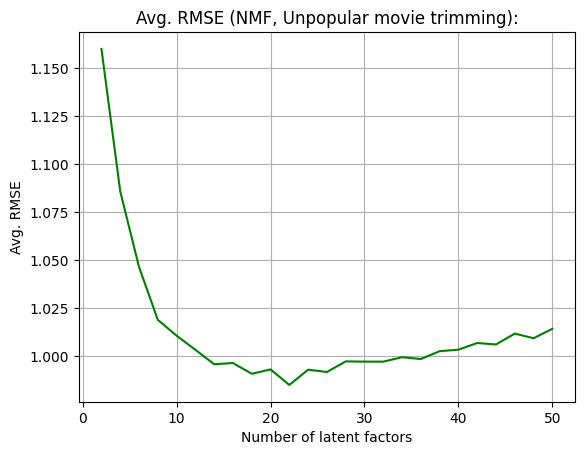

In [13]:
plt.plot(k,rmse_NMF_unpop,linestyle='-',color='g')
plt.grid(linestyle='-')
plt.title('Avg. RMSE (NMF, Unpopular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.show()


In [14]:
print("Minimum avg. RMSE (NMF, Unpopular movie trimming):", min(rmse_NMF_unpop))


Minimum avg. RMSE (NMF, Unpopular movie trimming): 0.9848487484434664


# High variance trim NMF

In [15]:
rmse_NMF_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = NMF(n_factors=item,n_epochs=50,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_NMF_var.append(np.mean(local_rmse))


Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


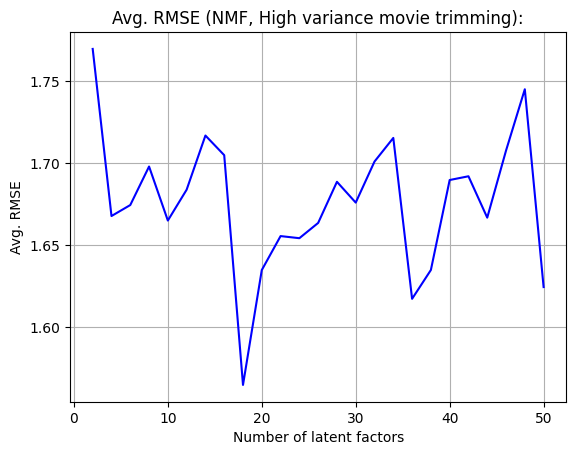

In [16]:
plt.plot(k,rmse_NMF_var,linestyle='-',color='b')
plt.grid(linestyle='-')
plt.title('Avg. RMSE (NMF, High variance movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.show()


In [17]:
print("Minimum avg. RMSE (NMF, High variance movie trimming):", min(rmse_NMF_var))

Minimum avg. RMSE (NMF, High variance movie trimming): 1.5648267743907396


# ROC NMF

In [18]:
k = k[[i for i, x in enumerate(rmse_NMF) if x == min(rmse_NMF)][0]]
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = NMF(n_factors=k,n_epochs=50,verbose=False).fit(trainset).test(testset)


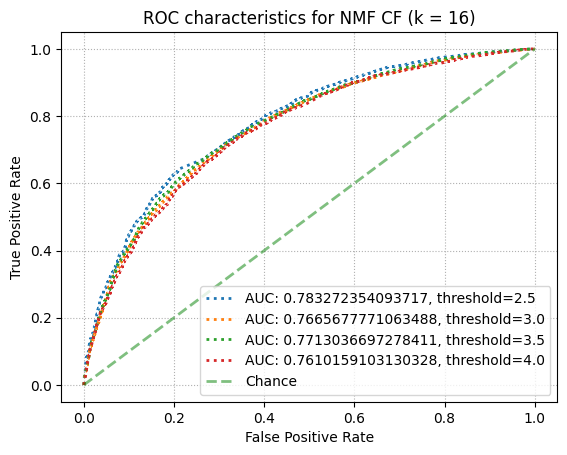

In [19]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for NMF CF (k = 16)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Answer 8C

Popular, unpopular and high variance trimmed average RMSE and MAE plots are as shown above. Min avg RMSE (NMF) are reported below :

| Trimming Type                        | Minimum Avg. RMSE (NMF)        |
|--------------------------------------|--------------------------------|
| Popular Movie Trimming               | 0.8704                         |
| Unpopular Movie Trimming             | 0.9848                         |
| High Variance Movie Trimming         | 1.5648                         |

• ROC curve for NMF along with AUC values is as condensed into one plot as shown above


In [22]:
genre = pd.read_csv(dataset_path+'movies.csv',usecols=['movieId','title','genres'])
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
nmf = NMF(n_factors=20,n_epochs=50,verbose=False)
nmf.fit(trainset).test(testset)
U = nmf.pu
V = nmf.qi


In [27]:
for item in range(20):
    print('Column number of V: ',item)
    selected_col = V[:,item]
    sorted_col = np.argsort(selected_col)[::-1]
    for i in sorted_col[0:10]:
        print(genre['genres'][i])
    print('---------------------------------------------')

Column number of V:  0
Comedy
Action|Crime|Drama|War
Drama|Fantasy|Musical|Mystery|Sci-Fi
Comedy|Crime|Drama
Animation|Children|Comedy
Children|Comedy|Romance|Sci-Fi
Drama
Drama|Romance
Drama
Crime|Drama|Mystery|Romance|Thriller
---------------------------------------------
Column number of V:  1
Crime|Drama
Drama|Mystery
Action|Comedy
Comedy|War
Action|Children
Comedy|Romance
Drama
Drama
Comedy
Drama|War
---------------------------------------------
Column number of V:  2
Drama
Comedy|Horror|Thriller
Adventure|Drama|Sci-Fi
Drama
Drama
Animation|Sci-Fi
Drama
Comedy|Sci-Fi
Adventure|Fantasy|IMAX
Drama|Thriller
---------------------------------------------
Column number of V:  3
Action|Adventure|Romance
Adventure|Drama|Horror|Sci-Fi|Thriller
Comedy
Action|Comedy
Drama
Action|Crime
Drama|Mystery|Thriller
Comedy|Musical
Drama|Romance
Drama|Horror|Mystery|Thriller
---------------------------------------------
Column number of V:  4
Action|Sci-Fi
Comedy|Crime|Drama
Comedy|Drama|Romance
Comed

# Answer 9

Looking at the genre list, it's evident that the top 10 movies are concentrated within specific genres. Each latent factor tends to cluster movies from distinct genre groups. For instance, latent factor 19 predominantly includes movies from the comedy and drama genres, latent factor 5 features movies from the drama/romance genres, and latent factor 7 encompasses movies from the action, crime, and horror genres.


# MF CF

In [34]:
k = np.arange(2,52,2)
rmse_SVD = []
mae_SVD = []
for item in k:
    print('Testing for k =',item)
    res = cross_validate(SVD(n_factors=item,n_epochs=20,verbose=False),
                         measures=['rmse','mae'],data = ratings_dataset,cv=10,n_jobs=-1)   
    rmse_SVD.append(np.mean(res['test_rmse']))
    mae_SVD.append(np.mean(res['test_mae']))


Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


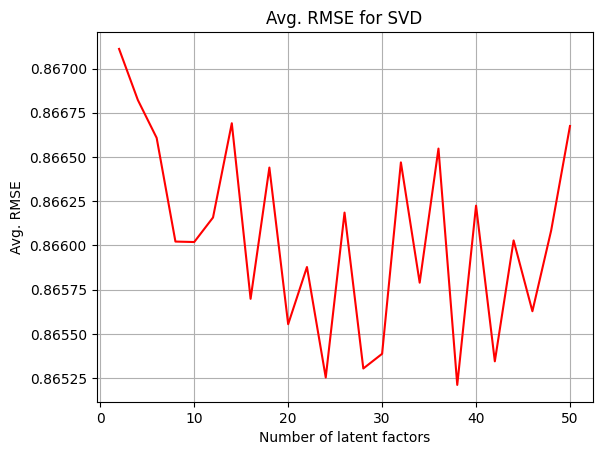

In [35]:
plt.plot(k,rmse_SVD,linestyle='-',color='r')
plt.grid(linestyle='-')
plt.title('Avg. RMSE for SVD')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.show()


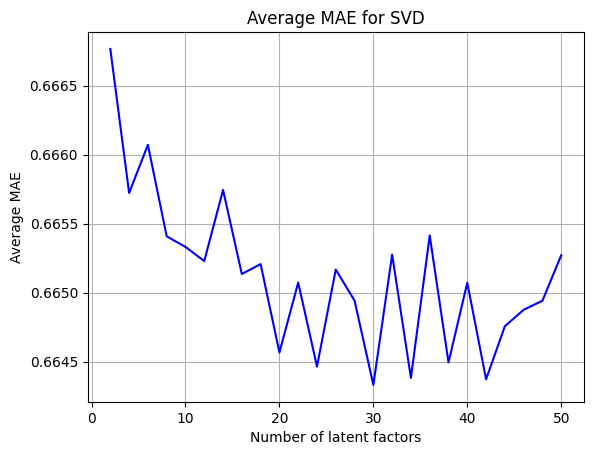

In [36]:
plt.plot(k,mae_SVD,linestyle='-',color='b')
plt.grid(linestyle='-')
plt.title('Average MAE for SVD')
plt.ylabel('Average MAE')
plt.xlabel('Number of latent factors')
plt.show()


In [37]:
print("Minimum avg. RMSE (SVD): %f, value of k: %d" % (min(rmse_SVD),k[[i for i, x in enumerate(rmse_SVD) if x == min(rmse_SVD)][0]]))
print("Minimum avg. MAE (SVD): %f, value of k: %d" % (min(mae_SVD),k[[i for i, x in enumerate(mae_SVD) if x == min(mae_SVD)][0]]))


Minimum avg. RMSE (SVD): 0.865211, value of k: 38
Minimum avg. MAE (SVD): 0.664331, value of k: 30


# Answer 10A

The Average RMSE and MAE plots are as shown above. 


# Answer 10B
| Metric              | Minimum Avg. Value | Value of k |
|---------------------|--------------------|------------|
| RMSE (MF)          | 0.8652             | 38         |
| MAE (MF)           | 0.6643             | 30         |


We decided to stick to $k = 30$, as it is closer to the actual number of
movie genres ($19$).


# MF Popular trim

rmse_SVD_pop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_pop.append(np.mean(local_rmse))


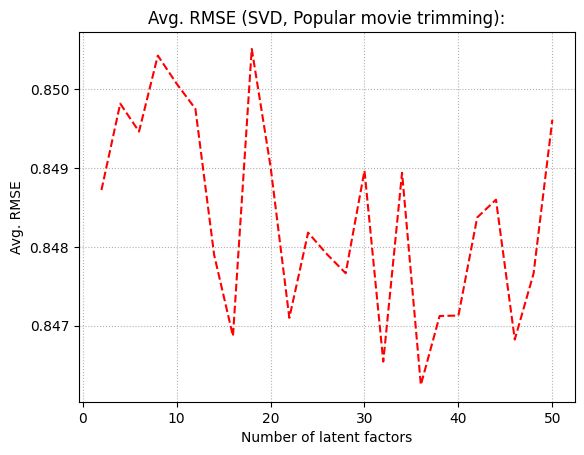

In [39]:
plt.plot(k,rmse_SVD_pop,linestyle='-',color='r')
plt.grid(linestyle='-')
plt.title('Avg. RMSE (SVD, Popular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.show()


In [40]:
print("Minimum avg. RMSE (SVD, Popular movie trimming):", min(rmse_SVD_pop))


Minimum avg. RMSE (SVD, Popular movie trimming): 0.8462452301342986


# MF Unpopular trim

In [41]:
rmse_SVD_unpop = []
kf =  KFold(n_splits=10)
for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in testset if j[1] not in trim_list]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_unpop.append(np.mean(local_rmse))


Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


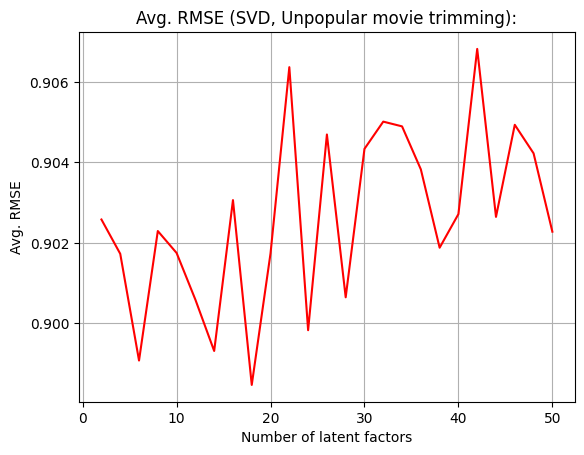

In [42]:
plt.plot(k,rmse_SVD_unpop,linestyle='-',color='r')
plt.grid(linestyle='-')
plt.title('Avg. RMSE (SVD, Unpopular movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.show()


In [43]:
print("Minimum avg. RMSE (SVD, Unpopular movie trimming):", min(rmse_SVD_unpop))


Minimum avg. RMSE (SVD, Unpopular movie trimming): 0.8984724164026547


# MF High variance trim

In [44]:
rmse_SVD_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    local_rmse = []
    print('Testing for k =',item)
    for trainset, testset in kf.split(ratings_dataset):
        trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(trainset).test(trimmed_set)
        local_rmse.append(accuracy.rmse(res,verbose=False))
    rmse_SVD_var.append(np.mean(local_rmse))

Testing for k = 2
Testing for k = 4
Testing for k = 6
Testing for k = 8
Testing for k = 10
Testing for k = 12
Testing for k = 14
Testing for k = 16
Testing for k = 18
Testing for k = 20
Testing for k = 22
Testing for k = 24
Testing for k = 26
Testing for k = 28
Testing for k = 30
Testing for k = 32
Testing for k = 34
Testing for k = 36
Testing for k = 38
Testing for k = 40
Testing for k = 42
Testing for k = 44
Testing for k = 46
Testing for k = 48
Testing for k = 50


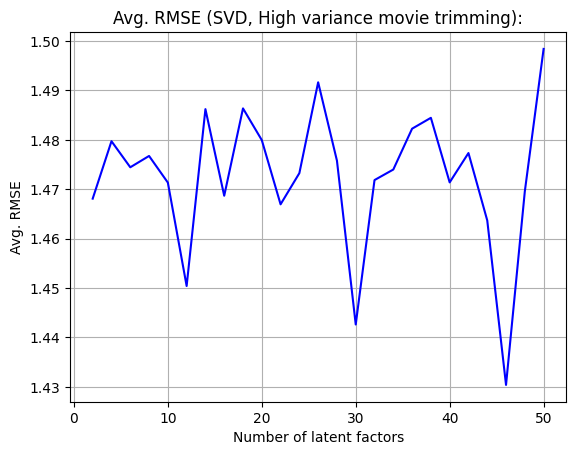

In [45]:
plt.plot(k,rmse_SVD_var,linestyle='-',color='b')
plt.grid(linestyle='-')
plt.title('Avg. RMSE (SVD, High variance movie trimming):')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of latent factors')
plt.show()


In [46]:
print("Minimum avg. RMSE (SVD, High variance movie trimming):", min(rmse_SVD_var))


Minimum avg. RMSE (SVD, High variance movie trimming): 1.4303842993990883


# MF ROC

In [48]:
k = k[[i for i, x in enumerate(rmse_SVD) if x == min(rmse_SVD)][0]]
thres = [2.5, 3.0, 3.5, 4.0]
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res  = SVD(n_factors=k,n_epochs=20,verbose=False).fit(trainset).test(testset)


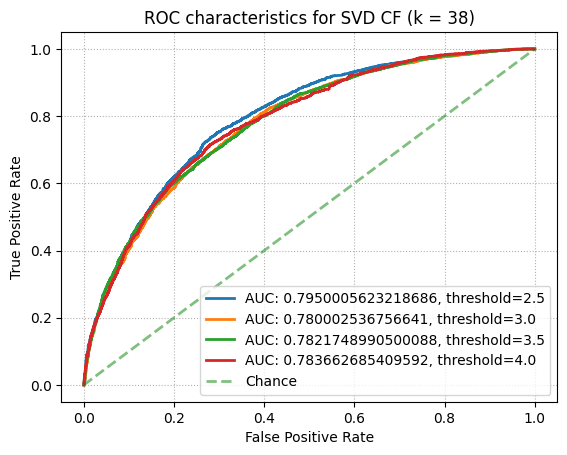

In [49]:
fig, ax = plt.subplots()
for item in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle='-',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for SVD CF (k = '+ str(k)+')')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Answer 10C

Popular, unpopular and high variance trimmed average RMSE and MAE plots are as shown above. Min avg RMSE (MF) are reported below :

| Trimming Type                        | Minimum Avg. RMSE (MF)        |
|--------------------------------------|--------------------------------|
| Popular Movie Trimming               | 0.8462                         |
| Unpopular Movie Trimming             | 0.8985                         |
| High Variance Movie Trimming         | 1.4304                         |

• ROC curve for MF (SVD) along with AUC is as condensed into one plot as shown above


# Naive collaborative filtering

In [50]:
user_ID_set = list(set(user_ID))
mean_ratings = []
for user in user_ID_set:
    idx = np.where(user_ID == user)
    mean_ratings.append(np.mean(rating[idx]))


In [51]:
kf = KFold(n_splits=10)
local_rmse = []
for trainset, testset in kf.split(ratings_dataset):
    res = [mean_ratings[int(row[0])-1] for row in testset]
    gt = [row[2] for row in testset]
    local_rmse.append(mean_squared_error(gt,res,squared=False))
rmse_naive = np.mean(local_rmse)


/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in

In [52]:
print('Avg. RMSE for Naive Filtering: ',rmse_naive)


Avg. RMSE for Naive Filtering:  0.9347068493123578


# Answer 11

Average RMSE for Naive Collaborative Filtering = 0.9347

# Naive CF Popular trim

In [53]:
local_rmse_naive_pop = []
kf =  KFold(n_splits=10)
for trainset, testset in kf.split(ratings_dataset):
    trim_list = []
    unique, counts = np.unique([row[1] for row in testset], return_counts=True)
    for i in range(len(counts)):
        if(counts[i]<=2):
            trim_list.append(unique[i])
    trimmed_set = [j for j in testset if j[1] not in trim_list]
    res = [mean_ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    local_rmse_naive_pop.append(mean_squared_error(gt,res,squared=False))
rmse_naive_pop = np.mean(local_rmse_naive_pop)

print('Avg. RMSE for Naive Filtering (Popular movie trimming): ',rmse_naive_pop)


/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in

Avg. RMSE for Naive Filtering (Popular movie trimming):  0.9213387590910491


/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Naive CF Unpopular trim

In [57]:
local_rmse_naive_unpop = []
kf =  KFold(n_splits=10)
for trainset, testset in kf.split(ratings_dataset):
    trim_list = []
    unique, counts = np.unique([row[1] for row in testset], return_counts=True)
    for i in range(len(counts)):
        if(counts[i]>2):
            trim_list.append(unique[i])
    trimmed_set = [j for j in testset if j[1] not in trim_list]
    res = [mean_ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    local_rmse_naive_unpop.append(mean_squared_error(gt,res,squared=False))
rmse_naive_unpop = np.mean(local_rmse_naive_unpop)
print('Avg. RMSE for Naive Filtering (Unpopular movie trimming): ',rmse_naive_unpop)


/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in

Avg. RMSE for Naive Filtering (Unpopular movie trimming):  0.9542029107785082


/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Naive CF High variance trim

In [55]:
local_rmse_naive_var = []
kf =  KFold(n_splits=10)
dict_of_items = {}
for j in ratings_dataset.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for trainset, testset in kf.split(ratings_dataset):
    trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
    res = [mean_ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    local_rmse_naive_var.append(mean_squared_error(gt,res,squared=False))
rmse_naive_var = np.mean(local_rmse_naive_var)

print('Avg. RMSE for Naive Filtering (High variance movie trimming): ',rmse_naive_var)


/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in

Avg. RMSE for Naive Filtering (High variance movie trimming):  1.4780141869117536


/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/itami/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Answer 11 (continued...)

| Trimming Type                        | Avg. RMSE for Naive Filtering  |
|--------------------------------------|---------------------------------|
| Popular Movie Trimming               | 0.9213                          |
| Unpopular Movie Trimming             | 0.9542                          |
| High Variance Movie Trimming         | 1.4780                          |


# Comparing  most performant models

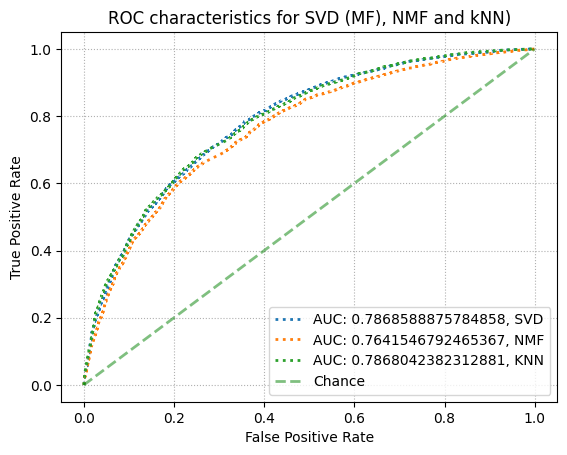

In [58]:
trainset, testset = train_test_split(ratings_dataset, test_size=0.1)
res_SVD  = SVD(n_factors=22,n_epochs=20,verbose=False).fit(trainset).test(testset)
res_NMF  = NMF(n_factors=16,n_epochs=50,verbose=False).fit(trainset).test(testset)
res_KNN = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)

fig, ax = plt.subplots()
thresholded_out = []
for row in res_SVD:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_SVD])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', SVD')  

thresholded_out = []
for row in res_NMF:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_NMF])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', NMF')  

thresholded_out = []
for row in res_KNN:
    if row.r_ui > 3:
        thresholded_out.append(1)
    else:
        thresholded_out.append(0)
fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res_KNN])
ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', KNN')  

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for SVD (MF), NMF and kNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Answer 12

ROC curves are as plotted in one condensed plot as above. 

One can see from plot that SVD CF performs best among all the CF, followed by k-NN CF and
NNMF-CF coming last. One can explain the performance as follows:

**SVD>NMF Reasons:**

• SVD effectively represents the higher-dimensional feature matrix without constraints on U and V, leading to a deep factorization with minimal information loss. In contrast, NMF imposes positivity constraints on U and V, resulting in fewer optimal choices.

•SVD produces embeddings with a hierarchical and geometric basis ordered by relevance, making them robust to outliers and noise. NMF, however, does not consider the geometry in the ratings matrix.
Embeddings from SVD are unique and deterministic, while NMF is non-unique and stochastic, lacking guarantees of convergence to optimal U and V.

• SVD accounts for user and movie-specific bias information, normalizing them to reduce sensitivity to outliers and noise.


**kNN < SVD Reasons (small difference):**

• k-NN lacks separate modeling of bias information for each user or item, making it more susceptible to outliers and seldom-rated items.
Direct inference on the sparse ratings matrix by k-NN results in poor prediction accuracy in high-dimensional space, exacerbating the curse of dimensionality and hindering scalability.

•Compared to latent-factor based models, k-NN is less generalizable, unable to discover semantic information and connections within the user-item ratings matrix while being sensitive to rarely rated items.





